In [5]:
import pymongo
from pymongo import MongoClient
import pandas as pd

In [3]:
connection_string = 'mongodb+srv://CnBUser:<password>@cluster0.n2pbusl.mongodb.net/?retryWrites=true&w=majority&appName=Cluster0'

In [6]:
client = MongoClient(connection_string)

In [8]:
db = client['APS_Project']

In [9]:
collection = db["monog_class"]

In [10]:
data = {
    'name':'Darshan',
    'age':'24'
}

In [11]:
collection.insert_one(data)

In [13]:
cursor = collection.find({})
for i in cursor:
    print(i)

{'_id': ObjectId('66756b6c5b6ece0b014a5140'), 'name': 'Darshan', 'age': '24'}


In [ ]:
#compass is the GUI for mongo db 

In [1]:
from sensor.utils.main_utils import read_yaml_file

In [3]:
file = read_yaml_file('config\schema.yaml')

In [7]:
len(file['numerical_columns'])

163

In [9]:
file.keys()

dict_keys(['columns', 'numerical_columns', 'drop_columns'])

In [1]:
from sensor.entity import artifacts_entity

In [3]:
a = artifacts_entity.DataIngestionArtifact

In [22]:
from sensor.pipeline.training_pipeline import TrainingPipeline
pp1 = TrainingPipeline() 
pp1.run_pipeline()

SensorException: Error=[Error=[Error=['NoneType' object has no attribute 'train_file_path'] occurred in file [d:\APS Project\sensor\components\data_validation.py] on line number [97]] occurred in file [d:\APS Project\sensor\pipeline\training_pipeline.py] on line number [37]] occurred in file [d:\APS Project\sensor\pipeline\training_pipeline.py] on line number [48]

AttributeError: 'NoneType' object has no attribute '__dict__'

In [19]:
df = pd.read_csv('data.csv')

In [20]:
len(df.columns)

171

In [10]:
from sensor.pipeline.training_pipeline import TrainingPipeline
pp1 = TrainingPipeline()
pp1.run_pipeline()

SensorException: Error=[Error=[Error=[Train files has different number of columns] occurred in file [d:\APS Project\sensor\components\data_validation.py] on line number [111]] occurred in file [d:\APS Project\sensor\pipeline\training_pipeline.py] on line number [37]] occurred in file [d:\APS Project\sensor\pipeline\training_pipeline.py] on line number [48]

In [6]:
df = pd.read_csv('data.csv')
df_og = pd.read_csv('data_0.csv')

In [26]:
x_null =df.isnull().mean()
    


In [27]:
x_null_df = pd.DataFrame(x_null).reset_index()

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
#x_null_df.rename(columns = {'index':'columns',0:'null_values'},inplace = True)


(<Axes: xlabel='columns'>, (171, 2))

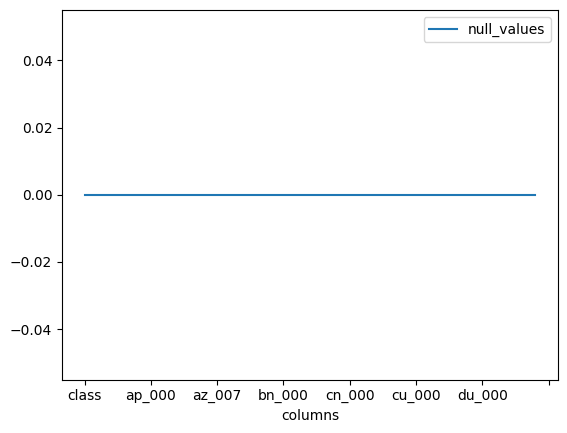

In [45]:
x_null_df.plot(x = 'columns',y = 'null_values'), x_null_df.shape

In [5]:
from scipy.stats import ks_2samp


In [8]:
def detect_dataset_drift(base:pd.DataFrame,current:pd.DataFrame,threshold = 0.5) :
        try:
            status = False
            #if status is true, drift is detected
            report = dict()

            for column in base.columns:
                d1 = base[column]
                d2 = current[column]
                is_same_dist = ks_2samp(d1,d2)

                if is_same_dist.pvalue <= threshold :
                    drift_in_col = False
                else:
                    drift_in_col = True
                    status = True
                report[column] = {
                    "drift_status":drift_in_col,
                    "p_value":float(is_same_dist.pvalue)
                }
            
            
            
            return report,status
        except Exception as e:
            print(e)

In [ ]:
detect_dataset_drift(df,df_og)

In [1]:
from sensor.pipeline.training_pipeline import TrainingPipeline
pp1 = TrainingPipeline()
pp1.run_pipeline()

SensorException: Error=[Error=[Error=[only integer scalar arrays can be converted to a scalar index] occurred in file [d:\APS Project\sensor\components\data_transformation.py] on line number [79]] occurred in file [d:\APS Project\sensor\pipeline\training_pipeline.py] on line number [50]] occurred in file [d:\APS Project\sensor\pipeline\training_pipeline.py] on line number [62]

In [2]:
import numpy as np

In [3]:
df

NameError: name 'df' is not defined

In [ ]:
np.c_()